<a href="https://colab.research.google.com/github/massaoiwanaga/topespsi/blob/main/TESI_VAC_COVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabalho Disciplina Topicos Especiais em Sistemas de Informação I**

---

## **Saúde (COVID-19)**

> Alessandra Pierro Saraiva
>
> Fabiane Monteiro Carvalho
>
> Massao Oliveira Iwanaga

### Importando a biblioteca pandas

In [3]:
# importando a biblioteca
import pandas as pd # pandas
import numpy as np  # numpy
import matplotlib.pyplot as plt                # importar a biblioteca matplotlib

### Instalação da biblioteca PROV

In [ ]:
#Instalação da biblioteca PROV no ambiente COLAB
#Essa biblioteca implementa em Python o Modelo de Dados PROV da W3C
!pip install prov

     |████████████████████████████████| 430kB 8.9MB/s 
     |████████████████████████████████| 235kB 16.4MB/s 
     |████████████████████████████████| 51kB 4.0MB/s 


## Informações de proveniência

In [28]:
# Working with PROV
# Pyhton 3.7.10 - Colab notebook

import sys, subprocess, datetime, random
from prov.model import ProvDocument                                                 #PROV Library


In [29]:
# Retrospective Provenance variables
agent    = input("Enter the name of the AGENT WHO is running the program: ")        #PROV-Agent
entity   = input("Enter the name of the ENTITY dataset: ")                          #PROV-Entity
activity = input("Enter the name of the ACTIVITY: ")                                #PROV-Activity
graph = entity                                                                      #PROV-Graph

Enter the name of the AGENT WHO is running the program: Massao
Enter the name of the ENTITY dataset: vacinação
Enter the name of the ACTIVITY: consulta


In [45]:
### BEGIN - Registering Retrospective Provenance -             #PROV-MODEL

# Creating an empty provenance document
d1 = ProvDocument()                                                 

In [46]:
# Declaring namespaces for various prefixes used in the excution of the experiment
d1.add_namespace('ufrj', 'http://www.ufrj.br/ppgi/')
d1.add_namespace('foaf', 'http://xmlns.com/foaf/0.1/')
d1.add_namespace('greco', 'http://www.ufrj.br/ppgi/greco/#')

# Adding an entity
entity = "ufrj:"+ entity
e1 = d1.entity(entity)

# Adding an Agent 
agent = "foaf:"+ agent
d1.agent(agent)

# Attributing the execution of the experiment to the PROV-Agent
d1.wasAttributedTo(e1, agent)

# Adding an activity
activity = "greco:"+ activity
d1.activity(activity)

# Generation
d1.wasGeneratedBy( entity, activity)

<ProvGeneration: (ufrj:ufrj:vacinação, greco:greco:consulta)>

In [47]:
# Adding a role to the PROV-Agent and timestamp to dataset
d1.agent(agent, {'prov:hadRole': 'Executor', 'foaf:mbox': 'massaoiwanaga@ufrj.br', 'prov:attributedAtTime': str(datetime.datetime.utcnow())})
d1.entity(entity, {'prov:generatedAtTime': str(datetime.datetime.utcnow())})

### END - Registering Retrospective Provenance 

<ProvEntity: ufrj:ufrj:vacinação>

In [48]:
### Optional outputs ####

#Generating the outup - a  Provenance Graph
from prov.dot import prov_to_dot
dot = prov_to_dot(d1)
graph = graph +".png"
dot.write_png('/content/drive/My Drive/TESI_FCD/'+graph)

In [49]:
#Generating the Serialization - Output XML
d1.serialize(entity + ".xml", format='xml') 

#Generating the Serialization - Output Turtle
d1.serialize(entity + ".ttl", format='rdf', rdf_format='ttl') 

In [50]:
#Generating the outup of Provenance document
print ('')
print ('simple provenance doc')
print(d1.get_provn())
print ('')


simple provenance doc
document
  prefix ufrj <http://www.ufrj.br/ppgi/>
  prefix foaf <http://xmlns.com/foaf/0.1/>
  prefix greco <http://www.ufrj.br/ppgi/greco/#>
  
  entity(ufrj:ufrj:vacinação)
  agent(foaf:foaf:Massao)
  wasAttributedTo(ufrj:ufrj:vacinação, foaf:foaf:Massao)
  activity(greco:greco:consulta, -, -)
  wasGeneratedBy(ufrj:ufrj:vacinação, greco:greco:consulta, -)
  agent(foaf:foaf:Massao, [prov:hadRole="Executor", foaf:mbox="massaoiwanaga@ufrj.br", prov:attributedAtTime="2021-03-16 00:12:02.945252"])
  entity(ufrj:ufrj:vacinação, [prov:generatedAtTime="2021-03-16 00:12:02.945470"])
endDocument



In [51]:
#Generating the Serialization - Output JSON
print ('')
print ('simple provenance JSON')
print(d1.serialize(indent=2))
print('')


simple provenance JSON
{
  "prefix": {
    "ufrj": "http://www.ufrj.br/ppgi/",
    "foaf": "http://xmlns.com/foaf/0.1/",
    "greco": "http://www.ufrj.br/ppgi/greco/#"
  },
  "entity": {
    "ufrj:ufrj:vacina\u00e7\u00e3o": [
      {},
      {
        "prov:generatedAtTime": "2021-03-16 00:12:02.945470"
      }
    ]
  },
  "agent": {
    "foaf:foaf:Massao": [
      {},
      {
        "prov:hadRole": "Executor",
        "foaf:mbox": "massaoiwanaga@ufrj.br",
        "prov:attributedAtTime": "2021-03-16 00:12:02.945252"
      }
    ]
  },
  "wasAttributedTo": {
    "_:id1": {
      "prov:entity": "ufrj:ufrj:vacina\u00e7\u00e3o",
      "prov:agent": "foaf:foaf:Massao"
    }
  },
  "activity": {
    "greco:greco:consulta": {}
  },
  "wasGeneratedBy": {
    "_:id2": {
      "prov:entity": "ufrj:ufrj:vacina\u00e7\u00e3o",
      "prov:activity": "greco:greco:consulta"
    }
  }
}



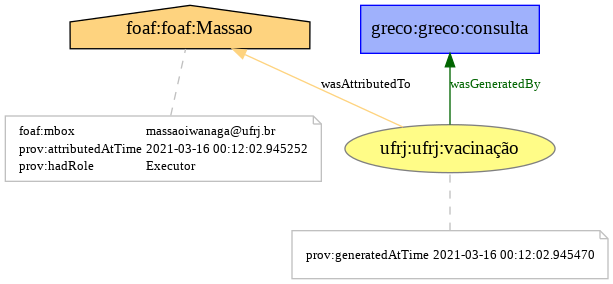

In [52]:
# Adding Vizualization the provenance graph in the Jupyter notebook
from IPython.display import Image
Image('/content/drive/My Drive/TESI_FCD/'+graph)

### Variáveis gerais do trabalho proposto

In [5]:
## Merge entre os dataFrames de Vacinação e CNES# UFs das regiões norte e sudeste, que serão analisadas no trabalho

UFs = ['RJ', 'SP','MG', 'ES', 'AM', 'AC', 'AP', 'PA', 'RO', 'RR']

### Acessar dados do Google Colab

In [6]:
# Se você está executando o notebook no Google Colab, é necessário montar o drive para o ambiente virtual do Google Drive
# Clicar no link que aparecerá e será gerada uma chave, que deverá ser colada no campo "Autorization code"

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## Importação do DataSet de Vacinação

In [7]:
# Salve o dataset de vacinação no diretório TESI_FCD no Google Drive
# Para tornar o notebook reutilizável, futuramente pode-se solicitar o diretório e o nome do dataset via prompt.

df_vacinacao = pd.read_csv('/content/drive/My Drive/TESI_FCD/part-00000-090405dc-80c4-4889-84c3-a9a390d06947-c000.csv',delimiter=',')

### Exploração inicial do DataSet de Vacinação

In [ ]:
print('Total de registros:',len(df_vacinacao))    # Quantidade de registros do dataset
print('')
print(df_vacinacao.info())  # Informações sobre o dataset 

Total de registros: 3981002

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3981002 entries, 1 to 6958577
Data columns (total 28 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   document_id                               object 
 1   paciente_id                               object 
 2   paciente_idade                            float64
 3   paciente_dataNascimento                   object 
 4   paciente_enumSexoBiologico                object 
 5   paciente_racaCor_codigo                   float64
 6   paciente_racaCor_valor                    object 
 7   paciente_endereco_coIbgeMunicipio         object 
 8   paciente_endereco_coPais                  object 
 9   paciente_endereco_nmMunicipio             object 
 10  paciente_endereco_nmPais                  object 
 11  paciente_endereco_uf                      object 
 12  paciente_nacionalidade_enumNacionalidade  object 
 13  estabelecimento_valor       

In [ ]:
df_vacinacao.head(10)        # Visualização dos registros iniciais

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_razaoSocial,estalecimento_noFantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_fabricante_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_nome,data_importacao_rnds
1,c6756cf9-0e0e-456b-86d2-94309b47e702-i0b0,3c73310d030b31ec5c73deda79bad2e8dbcc388839b6cd...,43.0,1977-12-05,F,1.0,BRANCA,352270,10,ITAPOLIS,BRASIL,SP,B,2747723,PREFEITURA MUNICIPAL DE ITAPOLIS,UBS JARDIM REDENCAO ITAPOLIS,352270.0,ITAPOLIS,SP,926,Outros,9.0,Trabalhadores de Saúde,Sinovac,2021-02-12T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-12 10:02:44
6,8f4eb329-7faf-4c69-a61c-9dc101542879-i0b0,db1db6b5eb18d38b0e40a112ba515a8f36adb47d605276...,25.0,1995-11-19,F,99.0,SEM INFORMACAO,130410,10,TAPAUA,BRASIL,AM,B,7723628,MINISTERIO DA SAUDE,DISTRITO SANITARIO ESPECIAL INDIGENA MEDIO PURUS,130240.0,LABREA,AM,701,Povos indígenas em terras indígenas,7.0,Povos Indígenas,FUNDACAO BUTANTAN,2021-02-03T03:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-11 19:06:14
8,5fdadf55-2a55-4089-a441-edbd2072074b-i0b0,95a4159ff54c9a30a0028ca52bda77eb02eccc28a506d1...,43.0,1977-05-16,M,1.0,BRANCA,355030,10,SAO PAULO,BRASIL,SP,B,2082829,PREFEITURA DO MUNICIPIO DE SAO PAULO,HOSP MUN PROFESSOR DOUTOR ALIPIO CORREA NETTO,355030.0,SAO PAULO,SP,926,Outros,9.0,Trabalhadores de Saúde,Sinovac,2021-02-16T00:00:00.000Z,2ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-16 10:02:13
9,09bb6609-7ec7-48f9-9337-73200618c567-i0b0,24a3311c4c88127b16f1c24cc379139ddd21095922e497...,80.0,1940-08-26,F,1.0,BRANCA,330455,10,RIO DE JANEIRO,BRASIL,RJ,B,7021771,SMS RIO CF RAIMUNDO ALVES NASCIMENTO AP 33,SMS CF RAIMUNDO ALVES NASCIMENTO AP 33,330455.0,RIO DE JANEIRO,RJ,205,Pessoas de 80 anos ou mais,2.0,Faixa Etária,FUNDACAO OSWALDO CRUZ,2021-02-27T03:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-02-27 12:52:28
10,02fe1f0e-06d5-4109-a533-d6603dbaca6d-i0b0,a6e0a508c903a0939ae3322684ebb9941622dedc9b98de...,53.0,1967-11-09,F,1.0,BRANCA,353860,10,PIRACAIA,BRASIL,SP,B,5935857,PREFEITURA MUNICIPAL DE SAO CAETANO DO SUL,HOSPITAL MUNICIPAL DE EMERGENCIAS ALBERT SABIN,354880.0,SAO CAETANO DO SUL,SP,926,Outros,9.0,Trabalhadores de Saúde,Sinovac,2021-02-19T00:00:00.000Z,2ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-19 05:02:59
13,8fbf3c2d-3ca9-4c6e-b92e-705bdaec83df-i0b0,0136e42421eb9afbf7391785b0cecfcde7ca0e39c15cee...,40.0,1980-11-08,F,1.0,BRANCA,354780,10,SANTO ANDRE,BRASIL,SP,B,2089238,HOSPITAL ALVORADA TAGUATINGA LTDA,HOSPITAL ALVORADA MOEMA,355030.0,SAO PAULO,SP,926,Outros,9.0,Trabalhadores de Saúde,AstraZeneca/Oxford,2021-02-03T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-02-03 15:02:00
16,fa1bc12c-02a1-406c-a5b3-8a965ee72560-i0b0,dbde4d61c53058ad0166c08facca37f1f5bfcaba964be7...,27.0,1994-01-11,M,1.0,BRANCA,330480,10,SAO FIDELIS,BRASIL,RJ,B,6583628,SECRETARIA MUNICIPAL DE SAUDE E PROMOCAO SOCIAL,SECRETARIA MUNICIPAL DE SAUDE DE SAO FIDELIS,330480.0,SAO FIDELIS,RJ,926,Outros,9.0,Trabalhadores de Saúde,FUNDACAO BUTANTAN,2021-02-24T03:00:00.000Z,2ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-24 14:45:19
17,1ffce367-8073-4e85-91ab-b2dafc5fa76d-i0b0,00f70ea535bc6d71bc81ff5eed26e987fa67cc548d20fb...,39.0,1981-10-13,F,4.0,AMARELA,150140,10,BELEM,BRASIL,PA,B,7780966,DEPARTAMENTO DE VIGILANCIA A SAUDE,DEVS,150140.0,BELEM,PA,907,Enfermeiro(a),9.0,Trabalhadores de Saúde,FUNDACAO OSWALDO CRUZ,2021-02-15T03:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-02-17 20:15:57
20,caf3bd45-a35f-45e0-9669-16dad747125d-i0b0,af9deace340fea4cd628a89b1d0fce03a66a58107d

In [ ]:
df_vacinacao.count()        # Quantidade de registros por coluna. 
                      # É possível observar que algumas colunas possuem quatidade inferior de registros, o que indica que será necessário 
                      #    tratamento de dados se essas colunas forem necessárias para análise

document_id                                 3981002
paciente_id                                 3981002
paciente_idade                              3981002
paciente_dataNascimento                     3981002
paciente_enumSexoBiologico                  3981002
paciente_racaCor_codigo                     3981002
paciente_racaCor_valor                      3981002
paciente_endereco_coIbgeMunicipio           3981002
paciente_endereco_coPais                    3981002
paciente_endereco_nmMunicipio               3981002
paciente_endereco_nmPais                    3981002
paciente_endereco_uf                        3981002
paciente_nacionalidade_enumNacionalidade    3974977
estabelecimento_valor                       3981002
estabelecimento_razaoSocial                 3981002
estalecimento_noFantasia                    3981002
estabelecimento_municipio_codigo            3981002
estabelecimento_municipio_nome              3981002
estabelecimento_uf                          3981002
vacina_grupo

## Eliminação de colunas e linhas que não serão utilizadas - Dataset Vacinação

In [ ]:
# Eliminação das colunas que não serão utilizadas nas análises

df_vacinacao = df_vacinacao.drop(['paciente_endereco_cep','vacina_lote','vacina_fabricante_referencia','vacina_codigo','sistema_origem'],axis=1)

KeyError: ignored

In [ ]:
# Como o dataset possui dados de todo o Brasil, os estados que não pertencem às regiões selecionadas para análise serão eliminados do dataframe
df_vacinacao = df_vacinacao.loc[(df_vacinacao['estabelecimento_uf'].isin(UFs))]

In [ ]:
print(df_vacinacao.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3981002 entries, 1 to 6958577
Data columns (total 28 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   document_id                               object 
 1   paciente_id                               object 
 2   paciente_idade                            float64
 3   paciente_dataNascimento                   object 
 4   paciente_enumSexoBiologico                object 
 5   paciente_racaCor_codigo                   float64
 6   paciente_racaCor_valor                    object 
 7   paciente_endereco_coIbgeMunicipio         object 
 8   paciente_endereco_coPais                  object 
 9   paciente_endereco_nmMunicipio             object 
 10  paciente_endereco_nmPais                  object 
 11  paciente_endereco_uf                      object 
 12  paciente_nacionalidade_enumNacionalidade  object 
 13  estabelecimento_valor                     int64  
 14  es

## Tratamento de valores nulos e/ou faltantes

## Identificação e tratamento de valores duplicados

Teste inicial de gráfico

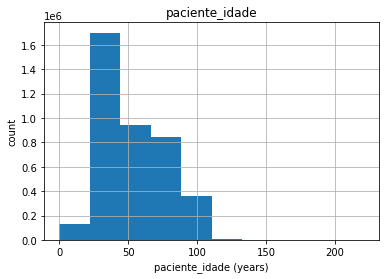

In [ ]:
# Plot 'Idade' variable in a histogram

pd.DataFrame.hist(df_vacinacao[['paciente_idade']])

plt.xlabel('paciente_idade (years)')

plt.ylabel('count')

plt.show()

## Importação do Dataset de Estabelecimentos de Saúde (CNES)

In [ ]:
# Salve o dataset de CNES no diretório TESI_FCD no Google Drive
# Para tornar o notebook reutilizável, futuramente pode-se solicitar o diretório e o nome do dataset via prompt.

df_cnes = pd.read_csv('/content/drive/My Drive/TESI_FCD/cnes_ativonone.csv',delimiter=',')

### Exploração inicial do DataSet de Estabelecimentos de Saúde (CNES)

In [ ]:
print('Total de registros:',len(df_cnes))    # Quantidade de registros do dataset
print('')
print(df_cnes.info())  # Informações sobre o dataset 

Total de registros: 354804

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354804 entries, 0 to 354803
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   co_cnes          354804 non-null  int64 
 1   co_ibge          354804 non-null  int64 
 2   no_fantasia      354796 non-null  object
 3   ds_tipo_unidade  354804 non-null  object
 4   tp_gestao        354804 non-null  object
 5   no_logradouro    354804 non-null  object
 6   nu_endereco      354517 non-null  object
 7   no_bairro        354801 non-null  object
 8   co_cep           354804 non-null  int64 
 9   uf               354434 non-null  object
 10  municipio        354434 non-null  object
 11  nu_telefone      279394 non-null  object
dtypes: int64(3), object(9)
memory usage: 32.5+ MB
None


In [ ]:
df_cnes.head(20)        # Visualização dos registros iniciais

,co_cnes,co_ibge,no_fantasia,ds_tipo_unidade,tp_gestao,no_logradouro,nu_endereco,no_bairro,co_cep,uf,municipio,nu_telefone
0,6577687,292240,SECRETARIA DE SAUDE DE MUTUIPE,CENTRAL DE GESTAO EM SAUDE,M,RUA RUY BARBOSA,S/N,CENTRO,45480000,BA,Mutuípe,NaN
1,6578500,500210,REABILIT CONSULTORIO DE FISIOTERAPIA,CLINICA/CENTRO DE ESPECIALIDADE,M,ALMIRANTE BARROSO,S/N,CENTRO,79260000,MS,Bela Vista,NaN
2,6577725,355660,SECRETARIA MUNICIPAL DE SAUDE E HIGIENE DE VER...,CENTRAL DE GESTAO EM SAUDE,M,RUA PAULO GUERREIRO FRANCO,997,CENTRO,17560000,SP,Vera Cruz,NaN
3,6577733,355410,CONS SERGIO LUIZ TEIXEIRA M PERES,CONSULTORIO ISOLADO,M,PCA MONS SILVA BARROS,254,CENTRO,12020070,SP,Taubaté,36351489
4,6577768,410490,LABORATORIO DOFF SOTTA,UNIDADE DE APOIO DIAGNOSE E TERAPIA (SADT ISOL...,M,RUA DR JORGE XAVIER DA SILVA,1078,CENTRO,84165000,PR,Castro,3232-4854
5,6577806,420245,SAMU BOMBINHAS,UNIDADE MOVEL DE NIVEL PRE-HOSPITALAR NA AREA ...,M,RUA CACHALOTE,589,MORRINHOS,88215000,SC,Bombinhas,33934363
6,6577830,240260,CENTRO DE ATENCAO PSICOSSOCIAL CAPS II,CENTRO DE ATENCAO PSICOSSOCIAL,M,RUA POETISA DOLORES,13,CENTRO,59570000,RN,Ceará-Mirim,(84)3274-5914
7,6577865,315960,DIMENSAO CLINICA MEDICA,UNIDADE DE APOIO DIAGNOSE E TERAPIA (SADT ISOL...,M,RUA CEL GABRIEL CAPISTRANO,256,CENTRO,37540000,MG,Santa Rita do Sapucaí,3534713531
8,6577873,355670,JULIANA PEREIRA PERSI,UNIDADE DE APOIO DIAGNOSE E TERAPIA (SADT ISOL...,M,RUA ROCINHA,213,CAPELA,13280000,SP,Vinhedo,38764932
9,6577881,231330,CENTRAL DE CONSULTORIOS,CLINICA/CENTRO DE ESPECIALIDADE,M,RUA MAFISA CIDRAO ROCHA,63,CENTRO,63660000,CE,Tauá,88-34371097


In [ ]:
df_cnes.count()        # Quantidade de registros por coluna. 
                      # É possível observar que algumas colunas possuem quatidade inferior de registros, o que indica que será necessário 
                      #    tratamento de dados se essas colunas forem necessárias para análise

co_cnes            354804
co_ibge            354804
no_fantasia        354796
ds_tipo_unidade    354804
tp_gestao          354804
no_logradouro      354804
nu_endereco        354517
no_bairro          354801
co_cep             354804
uf                 354434
municipio          354434
nu_telefone        279394
dtype: int64

In [ ]:
df_cnes.columns

Index(['co_cnes', 'co_ibge', 'no_fantasia', 'ds_tipo_unidade', 'tp_gestao',
       'no_logradouro', 'nu_endereco', 'no_bairro', 'co_cep', 'uf',
       'municipio', 'nu_telefone'],
      dtype='object')

## Eliminação de colunas e linhas que não serão utilizadas - Dataset Estabelecimentos de Saúde (CNES)

In [ ]:
# Eliminação das colunas que não serão utilizadas nas análises

df_cnes = df_cnes.drop(['no_logradouro','nu_endereco','no_bairro','co_cep','nu_telefone'],axis=1)

In [ ]:
df_cnes.columns

Index(['co_cnes', 'co_ibge', 'no_fantasia', 'ds_tipo_unidade', 'tp_gestao',
       'uf', 'municipio'],
      dtype='object')

## Merge entre os dataFrames de Vacinação e CNES

In [ ]:
pd.merge(df_vacinacao, df_cnes, on=None, left_on='estabelecimento_valor', right_on='co_cnes')

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_razaoSocial,estalecimento_noFantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_fabricante_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_nome,data_importacao_rnds,co_cnes,co_ibge,no_fantasia,ds_tipo_unidade,tp_gestao,uf,municipio
0,c6756cf9-0e0e-456b-86d2-94309b47e702-i0b0,3c73310d030b31ec5c73deda79bad2e8dbcc388839b6cd...,43.0,1977-12-05,F,1.0,BRANCA,352270,10,ITAPOLIS,BRASIL,SP,B,2747723,PREFEITURA MUNICIPAL DE ITAPOLIS,UBS JARDIM REDENCAO ITAPOLIS,352270.0,ITAPOLIS,SP,926,Outros,9.0,Trabalhadores de Saúde,Sinovac,2021-02-12T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-12 10:02:44,2747723,352270,UBS JARDIM REDENCAO ITAPOLIS,CENTRO DE SAUDE/UNIDADE BASICA,M,SP,Itápolis
1,85a346cd-aae6-47a6-8b89-1ce2c3dcacbb-i0b0,35d55970473ce949b1c9cd7a082b1a04a879378113f16e...,56.0,1964-12-10,F,1.0,BRANCA,352270,10,ITAPOLIS,BRASIL,SP,B,2747723,PREFEITURA MUNICIPAL DE ITAPOLIS,UBS JARDIM REDENCAO ITAPOLIS,352270.0,ITAPOLIS,SP,926,Outros,9.0,Trabalhadores de Saúde,Sinovac,2021-02-09T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-09 04:02:37,2747723,352270,UBS JARDIM REDENCAO ITAPOLIS,CENTRO DE SAUDE/UNIDADE BASICA,M,SP,Itápolis
2,d250e4f3-6ff9-4f37-8f6d-cd5a9f3879cd-i0b0,97c8e4ce239cd99aa3db8122f785c58436328db973b0e5...,40.0,1980-06-02,M,1.0,BRANCA,352270,10,ITAPOLIS,BRASIL,SP,B,2747723,PREFEITURA MUNICIPAL DE ITAPOLIS,UBS JARDIM REDENCAO ITAPOLIS,352270.0,ITAPOLIS,SP,926,Outros,9.0,Trabalhadores de Saúde,AstraZeneca/Oxford,2021-02-03T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-02-03 10:02:10,2747723,352270,UBS JARDIM REDENCAO ITAPOLIS,CENTRO DE SAUDE/UNIDADE BASICA,M,SP,Itápolis
3,92a49f7c-be44-4796-9e88-7527f5e355b2-i0b0,a581e01db894c667d6e6bd1793e613d5981cdc7ee0e86c...,79.0,1941-07-05,F,1.0,BRANCA,352270,10,ITAPOLIS,BRASIL,SP,B,2747723,PREFEITURA MUNICIPAL DE ITAPOLIS,UBS JARDIM REDENCAO ITAPOLIS,352270.0,ITAPOLIS,SP,204,Pessoas de 75 a 79 anos,2.0,Faixa Etária,Sinovac,2021-02-08T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-08 06:02:20,2747723,352270,UBS JARDIM REDENCAO ITAPOLIS,CENTRO DE SAUDE/UNIDADE BASICA,M,SP,Itápolis
4,968dba04-edde-4371-9ceb-206ec2b6e2da-i0b0,fea3a597ecd86a91e05f791b597c63cf540e7dc4451d40...,95.0,1925-08-03,F,1.0,BRANCA,352270,10,ITAPOLIS,BRASIL,SP,B,2747723,PREFEITURA MUNICIPAL DE ITAPOLIS,UBS JARDIM REDENCAO ITAPOLIS,352270.0,ITAPOLIS,SP,205,Pessoas de 80 anos ou mais,2.0,Faixa Etária,Sinovac,2021-02-08T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-08 05:02:01,2747723,352270,UBS JARDIM REDENCAO ITAPOLIS,CENTRO DE SAUDE/UNIDADE BASICA,M,SP,Itápolis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3841704,2dfcc705-e827-478d-83a6-0f46005c0389-i0b0,fcc80a11d76b1640683f91741086730b7ba90e2ff43412...,93.0,1928-01-26,M,1.0,BRANCA,314510,10,NOVA RESENDE,BRASIL,MG,B,9399798,PREFEITURA MUNICIPAL DE NOVA RESENDE,PSF SERRA II,314510.0,NOVA RESENDE,MG,205,Pessoas de 80 anos ou mais,2.0,Faixa Etária,FUNDACAO BUTANTAN,2021-02-12T03:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-26 18:37:37,9399798,314510,PSF SERRA II,CENTRO DE SAUDE/UNIDADE BASICA,M,MG,Nova Resende
3841705,7180c4be-1f9b-462d-a458-56cae6156fdc-i0b0,81a587c7b8c00bd970363bd409a3e2ec055ff3b01cbc80...,21.0,1999-06-25,F,3.0,PARDA,313250,10,ITAMARANDIBA,BRASIL,MG,B,2178168,PREFEITURA MUNICIPAL DE ITAMARANDIBA,POSTO DE SAUDE DE CONTRATO,313250.0,ITAMARANDIBA,MG,0,NaN,N